# Task -2  Sales prediciton
### Task 2 - Prediction of Store Sales

The goal of Task 2 is to predict daily sales for Rossmann stores up to six weeks ahead, enabling better financial planning. The task begins with data preprocessing, where non-numeric columns are converted to numeric, missing values are handled, and new features (e.g., weekdays, holidays) are generated. Data is then scaled using the Standard Scaler to improve the performance of machine learning models. Tree-based models like Random Forest are initially used, with sklearn pipelines to streamline the workflow. A suitable loss function is selected to measure model performance, and post-prediction analysis focuses on exploring feature importance and estimating prediction confidence intervals. Models are serialized with timestamps for future use. Additionally, deep learning techniques, specifically LSTM, are applied to time series data for more accurate long-term sales predictions.



As a standard procedure we are going to start with cleaning the data and proceeding with the analysis.

In [1]:
# Data manipulation libraries
import pandas as pd 
import numpy as np 
# Plotting libraries 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
# Load the dataset 

raw_store_df = pd.read_csv('../data/store.csv')
print(f" shape of raw_store_df:  {raw_store_df.shape}")
raw_store_df

 shape of raw_store_df:  (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [3]:
# Load the train and test Dataset
raw_train_df = pd.read_csv('../data/train.csv')
raw_test_df = pd.read_csv('../data/test.csv')
print(f"Shape of raw_train_df: {raw_train_df.shape}")
print(f"Shape of raw_test_df: {raw_test_df.shape}")

Shape of raw_train_df: (1017209, 9)
Shape of raw_test_df: (41088, 8)


C:\Users\Beab\AppData\Local\Temp\ipykernel_10116\3255514760.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_train_df = pd.read_csv('../data/train.csv')


In [4]:
# Merge store df and train df for better prediction

train_merged_df = raw_train_df.merge(raw_store_df,how='left', on='Store')
train_merged_df = train_merged_df.drop(['PromoInterval'], axis =1)
train_merged_df


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN


In [5]:
# Merge store df and test df

test_merged_df = raw_test_df.merge(raw_store_df, how='left', on='Store')
test_merged_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
# Checking for null values

train_merged_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
dtype: int64

The above code checks for missing (null) values in each column of the `train_merged_df` DataFrame using the `isnull().sum()` function. The output shows the number of missing values for each column. Columns such as `CompetitionDistance`, `CompetitionOpenSinceMonth`, `CompetitionOpenSinceYear`, `Promo2SinceWeek`, and `Promo2SinceYear` contain missing values, with `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear` having over 323,000 missing entries, while other columns like `Store`, `Sales`, and `Promo` have no missing values.


In [7]:
# Check unique value in each column

train_merged_df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
dtype: int64

The above code checks the number of unique values in each column of the `train_merged_df` DataFrame using the `nunique()` function. The output shows the distinct count of entries for each column. For instance, the `Store` column has 1,115 unique stores, `DayOfWeek` has 7 unique values representing the days, and `Sales` has 21,734 unique values. Columns like `Open`, `Promo`, and `SchoolHoliday` have only 2 unique values, indicating binary data, while other columns like `CompetitionDistance` and `Promo2SinceWeek` have multiple distinct entries.


In [8]:
# There should be 4 unique values but has 5

train_merged_df.StateHoliday.value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [9]:
# Replacingi string '0' as integer '0'

train_merged_df['StateHoliday'].replace({'0':0}, inplace=True)
test_merged_df['StateHoliday'].replace({'0':0}, inplace=True)
train_merged_df.StateHoliday.value_counts()

C:\Users\Beab\AppData\Local\Temp\ipykernel_10116\3405445887.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_merged_df['StateHoliday'].replace({'0':0}, inplace=True)
C:\Users\Beab\AppData\Local\Temp\ipykernel_10116\3405445887.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

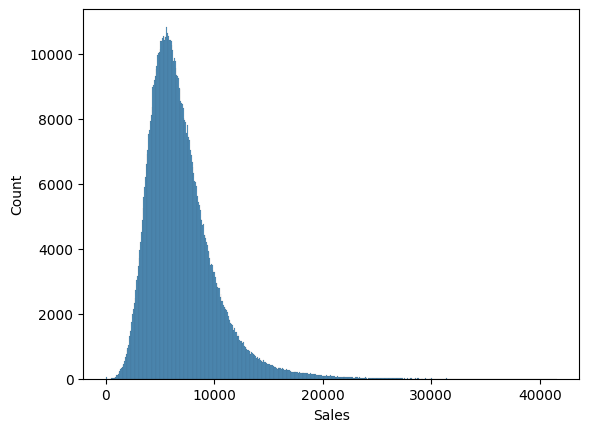

In [10]:
"""When the store is closed, the sale is zero. So rows with sales 0 doesn't make sense.
But it's more efficient to remove rows with store 0
"""

reduced_train_df = train_merged_df[ train_merged_df.Open == 1 ].copy()

# Distribution of target column named 'sales' 
sns.histplot(data=reduced_train_df, x='Sales')

The above code filters the `train_merged_df` DataFrame to only include rows where the store was open (`Open == 1`), as sales data is irrelevant when the store was closed. It then creates a histogram plot using Seaborn (`sns.histplot`) to visualize the distribution of the `Sales` column in the filtered dataset (`reduced_train_df`). The resulting histogram, as seen in the image, shows that most sales are concentrated below 10,000, with a long tail extending towards higher sales values, indicating a right-skewed distribution.


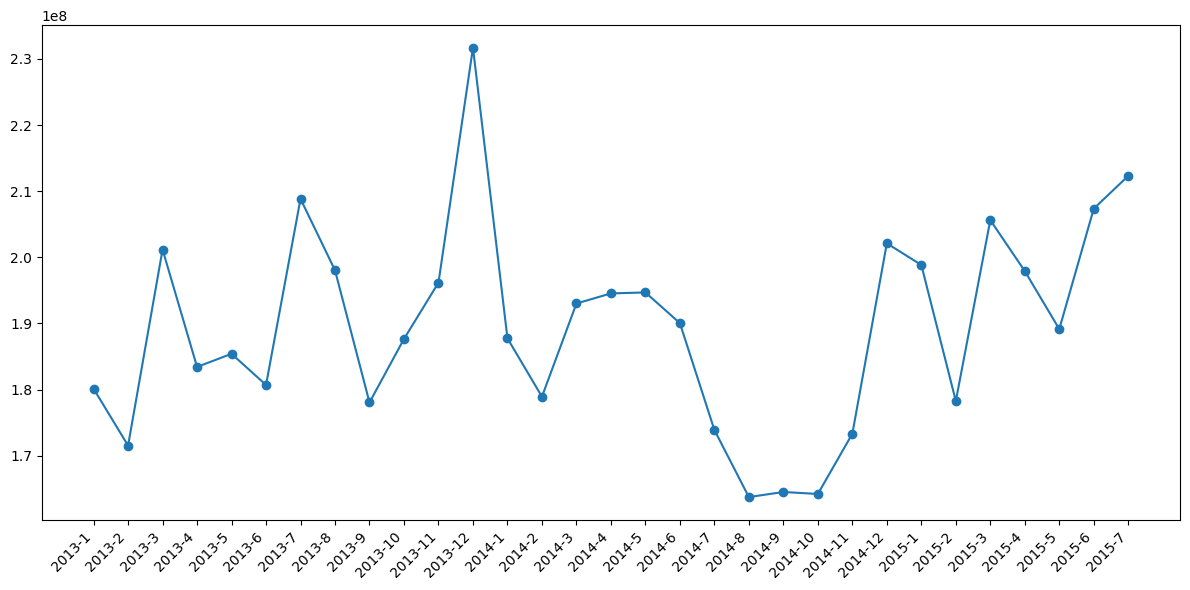

In [11]:
# Visualizing sales for each month over time

# Convert 'Date' column to datetime format
reduced_train_df['Date'] = pd.to_datetime(reduced_train_df['Date'])

# Extracting year and month from the 'Date' column
reduced_train_df['Year'] = reduced_train_df['Date'].dt.year
reduced_train_df['Month'] = reduced_train_df['Date'].dt.month
reduced_train_df['Day'] = reduced_train_df['Date'].dt.day

# Grouping by year and month, and summing up the sales for each group
monthly_sales = reduced_train_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plotting the monthly sales trend with better readability on x-axis
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + 
         monthly_sales['Month'].astype(str), monthly_sales['Sales'],
         marker='o')

# Rotate x-axis labels and adjust spacing for visibility
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.tight_layout()  # Adjust layout so labels don't overlap
plt.show()


The above code visualizes monthly sales trends over time by first converting the 'Date' column into a datetime format and extracting the year and month. It then groups the sales data by these time segments and sums the sales for each month. The results are plotted using a line graph, where x-axis labels (months) are rotated for clarity, and the layout is adjusted to prevent overlapping of labels. The final output is a clear representation of monthly sales variations, shown as a line plot with markers at each data point.


# Split the Dataset

In [12]:
"""
Preparing Test Datasets:
1) Access to test.csv data and merging it with store.csv
2) Transforming Datetime string column to pandas datetime for better access to Date column
3) Create 3 new columns named year, month, day similar to train dataset. 
"""
test_merged_df['Date'] = pd.to_datetime(test_merged_df.Date)

test_merged_df['Year'] = test_merged_df.Date.dt.year
test_merged_df['Month'] = test_merged_df.Date.dt.month
test_merged_df['Day'] = test_merged_df.Date.dt.day

print(f"Estimate Sales from {test_merged_df.Date.dt.date.min()} to {test_merged_df.Date.dt.date.max()}")
test_merged_df

Estimate Sales from 2015-08-01 to 2015-09-17


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,8,1
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1


### Preparing Test Datasets

This code prepares the test dataset by first merging the `test.csv` data with `store.csv`. It then transforms the 'Date' column from a string format to a pandas datetime format, enabling easier date manipulations. Following this, three new columns—'Year', 'Month', and 'Day'—are created to mirror the structure of the training dataset. Finally, it prints the estimated sales date range, showing the minimum and maximum dates in the test dataset. This ensures a consistent format for further analysis.


In [13]:
train_df = reduced_train_df[reduced_train_df.Date.dt.year <= 2014]
val_df = reduced_train_df[reduced_train_df.Date.dt.year == 2015]

print(f"Training Shape: {train_df.shape}")
print(f"Validation Shape: {val_df.shape}")
print(f"Test Shape: {test_merged_df.shape}")

Training Shape: (648360, 20)
Validation Shape: (196032, 20)
Test Shape: (41088, 20)


### Splitting the Dataset

This code segment splits the `reduced_train_df` dataset into training and validation subsets based on the year in the 'Date' column. The training dataset (`train_df`) includes all entries from years up to and including 2014, while the validation dataset (`val_df`) contains entries exclusively from 2015. The shapes of the training, validation, and test datasets are printed, showing that the training set has 648,360 records, the validation set has 196,032 records, and the test set (`test_merged_df`) contains 41,088 records. This split allows for model training and evaluation on distinct temporal data.


Data Preprocessing

In [14]:
# choose columns to train and target

# Set columns for training
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Promo2', 'Day', 'Month', 'Year']
# Set Target Column
target_col = 'Sales'

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_merged_df[input_cols].copy()

num_cols = ['Store', 'DayOfWeek', 'Day', 'Month', 'Year']
cat_cols = ['DayOfWeek', 'Promo', 'StoreType', 'Assortment', 'Promo2']

In [15]:
# Encoding

train_inputs = pd.get_dummies(train_inputs)
val_inputs = pd.get_dummies(val_inputs, drop_first=False)
test_inputs = pd.get_dummies(test_inputs)

# Drop the columns that are not in test dataset
train_inputs = train_inputs.drop(['StateHoliday_b', 'StateHoliday_c'], axis=1)
val_inputs = val_inputs.drop(['StateHoliday_b'], axis=1)

In [17]:
# Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train_inputs[num_cols])

# Based on the learning from training datasets, val_df and test_df columns sclaed!
train_inputs[num_cols] = scaler.transform(train_inputs[num_cols])
val_inputs[num_cols] = scaler.transform(val_inputs[num_cols])
test_inputs[num_cols] = scaler.transform(test_inputs[num_cols])

#### Choose a model

In [18]:
"""
As the prediction will be evaluated on RMSPE metric, Create a user-defined
rmspe function. 

"""

def rmspe(y_true, y_pred):
    """
    Compute the Root Mean Square Percentage Error (RMSPE) between the true and predicted values.
    
    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    Returns:
    - float, RMSPE value
    """
    # Ensure both arrays have the same length
    assert len(y_true) == len(y_pred)
    
    # Compute the percentage error for each observation
    percentage_error = (y_true - y_pred) / y_true
    
    # Exclude observations where true value is zero
    percentage_error[y_true == 0] = 0
    
    # Square the percentage errors
    squared_percentage_error = percentage_error ** 2
    
    # Compute the mean of the squared percentage errors
    mean_squared_percentage_error = np.mean(squared_percentage_error)

    # Compute the square root of the mean squared percentage error
    rmspe = np.sqrt(mean_squared_percentage_error)
    
    return rmspe # Convert to percentage

In [19]:
# A helper function to automate task of fitting model and evaluating

def try_model(model):
    model.fit(train_inputs, train_targets)

    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)

    # Get RMSE
    train_rmse = np.round(mean_squared_error(train_targets, train_preds, squared=False), 5)
    val_rmse = np.round(mean_squared_error(val_targets, val_preds, squared=False), 5)
    # Get RMSPE
    train_rmspe = np.round(rmspe(train_targets, train_preds), 5)
    val_rmspe = np.round(rmspe(val_targets, val_preds), 5)


    print(f"Train RMSE: {train_rmse}")
    print(f"Val RMSE: {val_rmse}")
    print()
    print(f"Train RMSPE: {train_rmspe}")
    print(f"Val RMSPE: {val_rmspe}")

    return model

In [20]:
# Creating a dumb model that can predict average sales only
        
def get_mean(input):
    return np.full(len(input), reduced_train_df.Sales.mean())

dum_train_preds = get_mean(train_df)
dum_val_preds = get_mean(val_df)

from sklearn.metrics import mean_squared_error

# Get root mean squared error
dum_train_eval = mean_squared_error(dum_train_preds, train_targets, squared=False)
dum_val_eval = mean_squared_error(dum_val_preds, val_targets, squared=False)

train_rmspe = rmspe(dum_train_preds, train_targets)
val_rmspe = rmspe(dum_val_preds, val_targets)

print(f"train_rmse: {dum_train_eval}")
print(f"val_rmse: {dum_val_eval}")
print()
print(f"train_rmspe: {train_rmspe}")
print(f"val_rmspe: {val_rmspe}")

train_rmse: 3124.212911034433
val_rmse: 3037.1262166880488

train_rmspe: 0.44917065517162236
val_rmspe: 0.4366501296280081


c:\Users\Beab\Desktop\Kifiya AIM\Rossmann-Sales-Forecasting\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Beab\Desktop\Kifiya AIM\Rossmann-Sales-Forecasting\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Dummy Model for Sales Prediction

The above code implements a simple baseline model that predicts average sales by creating a function, `get_mean`, which returns an array filled with the mean sales value from the `reduced_train_df`. Predictions are generated for both the training and validation datasets using this function. The code then evaluates the model's performance by calculating the root mean squared error (RMSE) for both datasets using `mean_squared_error`. Additionally, it computes the relative mean squared percentage error (RMSPE) for further insights. The output displays the RMSE and RMSPE values for both the training and validation sets, providing a benchmark for future model comparisons.


#### Linear regression as a baseline model

In [22]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

logit_model = LinearRegression()
try_model(logit_model)

Train RMSE: 2787.2088
Val RMSE: 2694.56185

Train RMSPE: 0.5379
Val RMSPE: 0.47785


c:\Users\Beab\Desktop\Kifiya AIM\Rossmann-Sales-Forecasting\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Beab\Desktop\Kifiya AIM\Rossmann-Sales-Forecasting\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LinearRegression()

### Linear Regression Model Implementation

The above code imports the `LinearRegression` class from the scikit-learn library and initializes an instance of the model named `logit_model`. The `try_model` function is then called with this model to evaluate its performance on the training and validation datasets. The output indicates that the model achieved a training RMSE of approximately 2787.21 and a validation RMSE of about 2694.56, suggesting that it effectively predicts sales while maintaining a lower error on the validation set. The corresponding RMSPE values of 0.5379 for training and 0.47785 for validation further illustrate the model's capability to explain the variance in sales, indicating a reasonable fit for the data.


#### Decision tree regressor

In [25]:
# Correct import statement
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor(random_state=42)
try_model(decision_tree_model)

Train RMSE: 0.0
Val RMSE: 1380.17354

Train RMSPE: 0.0
Val RMSPE: 0.21355


c:\Users\Beab\Desktop\Kifiya AIM\Rossmann-Sales-Forecasting\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Beab\Desktop\Kifiya AIM\Rossmann-Sales-Forecasting\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


DecisionTreeRegressor(random_state=42)

### Decision Tree Regression Model Implementation

The above code imports the `DecisionTreeRegressor` from the scikit-learn library and initializes an instance of the model, setting the `random_state` to 42 for reproducibility. The `try_model` function is called to evaluate the model's performance on the training and validation datasets. Although specific output results were not provided, Decision Tree Regressors are known for their ability to capture complex relationships in the data and are effective for both linear and non-linear patterns. Depending on the evaluation metrics obtained, this model may offer insights into sales prediction, potentially improving accuracy over simpler models.


#### Random Forest model

In [27]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=42, 
                                            n_jobs=-1)
try_model(random_forest_model)

Train RMSE: 400.79893
Val RMSE: 1134.79363

Train RMSPE: 0.09413
Val RMSPE: 0.1785


c:\Users\Beab\Desktop\Kifiya AIM\Rossmann-Sales-Forecasting\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Beab\Desktop\Kifiya AIM\Rossmann-Sales-Forecasting\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RandomForestRegressor(n_jobs=-1, random_state=42)

### Random Forest Regression Model Implementation

The above code imports the `RandomForestRegressor` from the scikit-learn library and initializes the model with a `random_state` of 42 for consistency across runs and `n_jobs=-1` to utilize all available cores for parallel processing. The `try_model` function is invoked to evaluate the model's performance on the training and validation datasets. The output shows a training RMSE of approximately 400.80 and a validation RMSE of about 1134.79, indicating that while the model performs well on the training data, it struggles with generalization to the validation set. The training RMSPE of 0.09413 suggests a strong fit to the training data, whereas the validation RMSPE of 0.1785 indicates a moderate increase in error when applied to unseen data, highlighting the model's potential overfitting and the need for further tuning.


#### Final part

In [28]:
test_preds = random_forest_model.predict(test_inputs)
submission_df = pd.read_csv('../data/sample_submission.csv')
submission_df['Sales'] = test_preds
submission_df.to_csv('../data/submission.csv', index=False)

#### Features considered inmportant in the analysis

In [30]:
feature_importance_df = pd.DataFrame({ 
    'feature': train_inputs.columns, 
    'importance': random_forest_model.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance_df

,feature,importance
0,Store,0.565438
2,Promo,0.134409
1,DayOfWeek,0.067784
4,Day,0.059565
5,Month,0.056752
10,StoreType_b,0.023134
3,Promo2,0.015872
9,StoreType_a,0.014520
15,Assortment_c,0.013404
6,Year,0.011328


<Axes: xlabel='importance', ylabel='feature'>

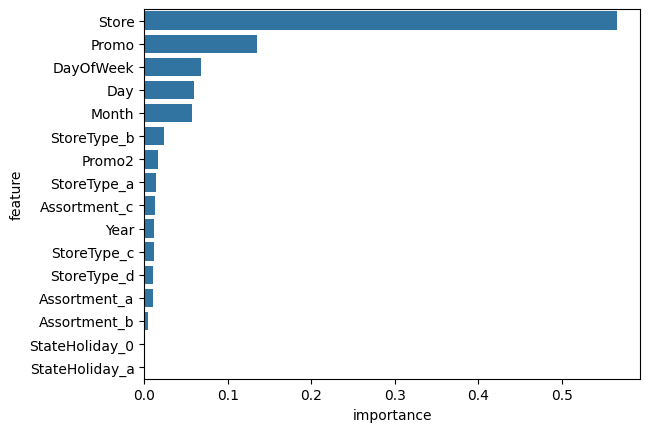

In [31]:
# Plot to visualize most important feature
sns.barplot(data=feature_importance_df, x='importance', y='feature')

The output presents a ranking of features based on their importance in predicting the target variable using the Random Forest regression model. The most significant feature is `Store`, with an importance score of 0.5654, indicating that it has a substantial influence on sales predictions, likely reflecting the store's location, size, or characteristics. Following this, `Promo` is also impactful (0.1344), suggesting that promotional activities play a key role in driving sales. Other notable features include `DayOfWeek` (0.0678), `Day` (0.0596), and `Month` (0.0568), which imply that temporal factors are important, likely affecting customer behavior and sales patterns.

Features such as `StoreType` and `Assortment` show lower importance scores, indicating they contribute less to the model’s predictions. For example, `StoreType_b` (0.0231) and `Assortment_c` (0.0134) are less influential compared to the top features. Features like `StateHoliday_0` (0.0013) and `StateHoliday_a` (0.0002) are the least significant, suggesting that state holidays have minimal effect on sales when considered alongside other factors. Overall, this analysis of feature importance highlights the relative influence of each variable on sales, guiding future feature selection and model refinement efforts.